cnn + aug

In [1]:
import os
import glob 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')

In [2]:
DATA_FRAMES = False
fem_path = 'Female_features.csv'
mal_path = 'Male_features.csv'

In [3]:
TESS = "D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/"
RAV = "D:/AAA_video_course/Programming/dataset/"
SAVEE = "D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/"
CREMA = "D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV/"

In [35]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/Actor_*/*.wav"):
        i=os.path.basename(file)
        if i[0]=='a':
            emotion.append('angry')
        elif i[0]=='d':
            emotion.append('disgust')
        elif i[0]=='f':
            emotion.append('fear')
        elif i[0]=='h':
            emotion.append('happy')
        elif i[0]=='n':
            emotion.append('neutral')
        elif i[0:2]=='sa':
            emotion.append('sad')
        elif i[0:2]=='su':
            emotion.append('surprise')
        else:
            emotion.append('error') 
        path.append(file)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,labels,path
0,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
1,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
2,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
3,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
4,angry,D:/AAA_video_course/Programming/A_main/zzzdata...


In [36]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,labels,path
0,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
1,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
2,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
3,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
4,angry,D:/AAA_video_course/Programming/A_main/zzzdata...


In [37]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


,labels,path
0,neutral,D:/AAA_video_course/Programming/dataset/Actor_...
1,neutral,D:/AAA_video_course/Programming/dataset/Actor_...
2,neutral,D:/AAA_video_course/Programming/dataset/Actor_...
3,neutral,D:/AAA_video_course/Programming/dataset/Actor_...
4,calm,D:/AAA_video_course/Programming/dataset/Actor_...


In [38]:
RavMales_df.head()

,labels,path
0,neutral,D:/AAA_video_course/Programming/dataset/Actor_...
1,neutral,D:/AAA_video_course/Programming/dataset/Actor_...
2,neutral,D:/AAA_video_course/Programming/dataset/Actor_...
3,neutral,D:/AAA_video_course/Programming/dataset/Actor_...
4,calm,D:/AAA_video_course/Programming/dataset/Actor_...


In [39]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


,labels,path
0,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
1,disgust,D:/AAA_video_course/Programming/A_main/zzzdata...
2,fear,D:/AAA_video_course/Programming/A_main/zzzdata...
3,happy,D:/AAA_video_course/Programming/A_main/zzzdata...
4,neutral,D:/AAA_video_course/Programming/A_main/zzzdata...


In [40]:
CremaMales_df.head()

,labels,path
0,angry,D:/AAA_video_course/Programming/A_main/zzzdata...
1,disgust,D:/AAA_video_course/Programming/A_main/zzzdata...
2,fear,D:/AAA_video_course/Programming/A_main/zzzdata...
3,happy,D:/AAA_video_course/Programming/A_main/zzzdata...
4,neutral,D:/AAA_video_course/Programming/A_main/zzzdata...


In [41]:
CremaMales_df['path'][2]

'D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1001_DFA_FEA_XX.wav'

In [42]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

# <center> Data Visualization

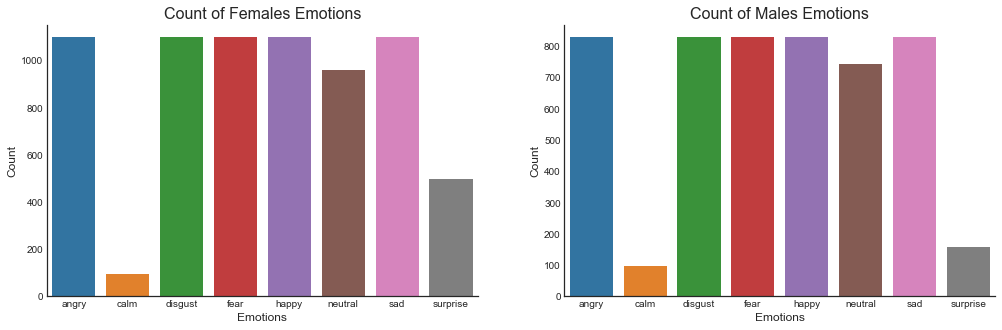

In [43]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [44]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

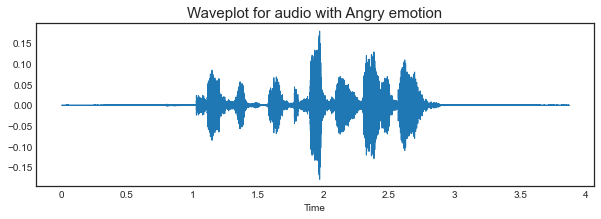

In [45]:
emotion='Angry'
path = RAV+'Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

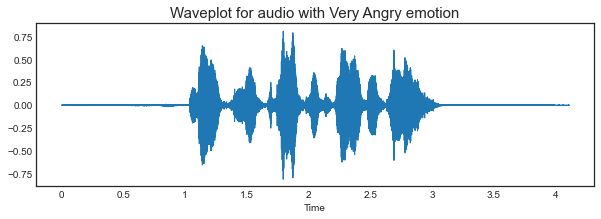

In [46]:
emotion='Very Angry' 
path = RAV+'/Actor_01/03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

In [47]:
"""emotion='Sing Angry'
path = RAV+'/Actor_01/03-02-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)
"""

"emotion='Sing Angry'\npath = RAV+'/Actor_01/03-02-05-01-01-01-01.wav'\ndata, sampling_rate = librosa.load(path)\ncreate_waveplot(data, sampling_rate, emotion)\nAudio(path)\n"

In [48]:
"""emotion='Sing Very Angry' 
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)
"""

"emotion='Sing Very Angry' \npath = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'\ndata, sampling_rate = librosa.load(path)\ncreate_waveplot(data, sampling_rate, emotion)\nAudio(path)\n"

## Adding augmentation

In [49]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

# taking any example and checking for techniques.
path = path = RAV+'/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

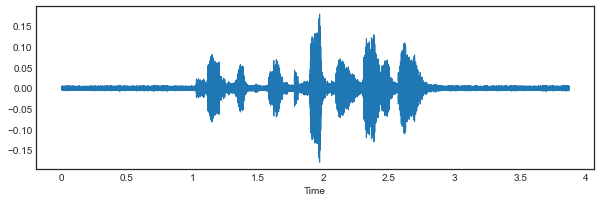

In [50]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<ipython-input-49-ecc89528e0f5>:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


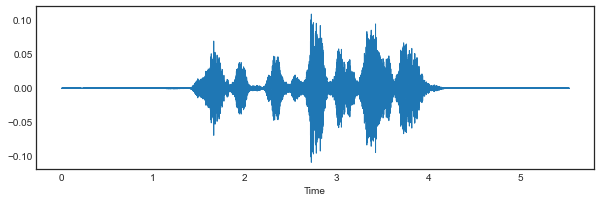

In [51]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

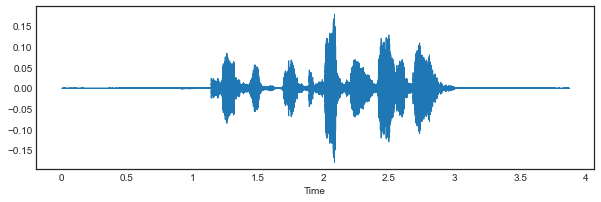

In [52]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<ipython-input-49-ecc89528e0f5>:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


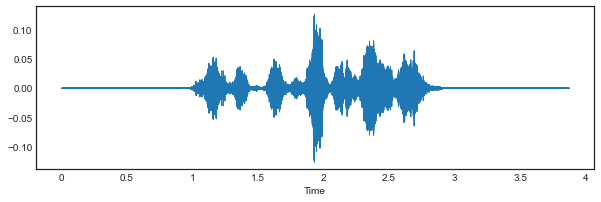

In [53]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<ipython-input-49-ecc89528e0f5>:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


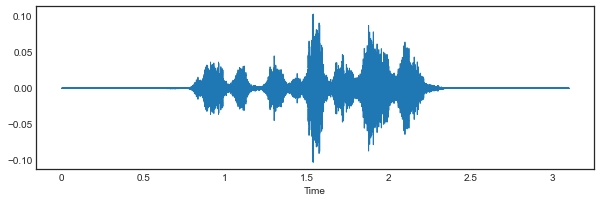

In [54]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<ipython-input-49-ecc89528e0f5>:20: FutureWarning: Pass rate=0.75 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


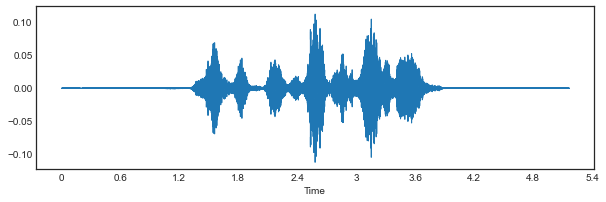

In [55]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# <center> Feature Extraction</center>

## Mel-Frequency Cepstral Coefficients (MFCCs)


In [56]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    
    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    """
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    """
    return result

In [57]:
if not DATA_FRAMES:    #if not dataframes
    
    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features: 
            female_X.append(elem)        
            female_Y.append(emotion)

    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)
            
    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

Check shapes:
Female features: 14064, labels: 14064
Male features:   10260, labels: 10260


In [58]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_aug_noise_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

In [59]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

Female dataframe


In [60]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

Male dataframe


In [61]:
Males_Features

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,labels
0,-286.454956,128.376801,10.631401,33.664001,10.761925,-6.441075,-31.459267,-5.089904,-2.580148,-15.037887,...,6.752302,5.448731,4.880051,5.754218,6.029959,5.221259,3.949572,3.903917,3.733851,angry
1,-92.909074,37.394764,20.925214,13.893877,4.871959,-4.794940,-10.385690,-8.368943,-6.605408,-7.291260,...,5.229483,4.247876,3.896098,3.631683,3.171264,2.744182,1.444021,1.762455,1.798007,angry
2,-269.432098,136.778290,-15.117785,17.631004,13.796480,-4.590364,-25.171482,3.966747,4.313670,-15.171036,...,8.038385,8.677552,8.465240,9.668501,9.665863,7.426920,4.911884,4.266898,4.267679,angry
3,-113.443533,52.610473,10.005123,5.368855,6.751369,-5.609721,-11.667549,-2.480846,-0.924196,-6.666604,...,7.137342,7.229494,7.481992,7.210506,7.032703,5.304872,3.558479,2.590844,2.051975,angry
4,-290.486755,118.324898,-4.787168,27.097588,8.342247,-6.421694,-20.878643,7.775195,-1.465789,-11.341057,...,-0.241740,1.587798,2.524612,3.000162,3.629077,2.786803,3.175283,4.088649,3.869761,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,-275.078770,53.023073,27.726314,16.475469,6.372393,4.699493,-6.171747,-5.490910,-2.018666,-2.999757,...,-2.578674,-1.295549,-0.635780,-0.685120,-0.184615,0.054955,0.075114,0.552870,0.687490,happy
10256,-456.587494,158.069977,-4.777621,63.961491,-17.987745,33.571392,-16.874243,1.957329,-0.303958,-2.991320,...,-1.610071,-0.589529,-1.278937,-1.842815,-0.981032,-1.892441,-1.253420,-1.238268,-1.237729,neutral
10257,-287.819705,37.247193,25.591058,17.773476,9.824074,8.098267,1.431515,-0.026076,-0.310719,-0.415687,...,-1.058728,-0.676987,-0.940112,-1.399299,-1.120161,-0.988372,-1.321654,-1.281727,-1.054347,neutral
10258,-464.283569,151.252640,0.940603,62.989738,-18.130768,32.340382,-15.307551,7.115883,1.889509,-6.158936,...,-1.650166,-1.624049,-2.075565,-1.318041,-1.589879,-2.381375,-0.617846,-1.428386,-1.887013,sad


# <center>Data Preparation


In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [63]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [64]:
# As this is a multiclass classification problem onehotencoding our Y.
import numpy as np
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

## Splitting data

Just for adding more proves that gender separation have sense

In [65]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19459, 58), (19459, 8), (4865, 58), (4865, 8))

In [66]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((11251, 58), (11251, 8), (2813, 58), (2813, 8))

In [67]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((8208, 58), (8208, 8), (2052, 58), (2052, 8))

In [68]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

## Making our data compatible to model

In [69]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((19459, 58, 1), (19459, 8), (4865, 58, 1), (4865, 8))

In [70]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((11251, 58, 1), (11251, 8), (2813, 58, 1), (2813, 8))

In [71]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((8208, 58, 1), (8208, 8), (2052, 58, 1), (2052, 8))

# <center>Modeling<center>

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [73]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [74]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [75]:
with strategy.scope():
    
    def build_model(in_shape):
        
        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
        
        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
          
        
        return model

In [76]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()
    
    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]
    
    return model

In [77]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 64
n_epochs = 75

In [78]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

## Model Summary and Pre-training Accuracy

In [79]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 256)           1792      
                                                                 
 average_pooling1d (AverageP  (None, 29, 256)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_1 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_2 (Averag  (None, 8, 128)           0

In [80]:
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_3 (Averag  (None, 29, 256)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_5 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_4 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_6 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_5 (Averag  (None, 8, 128)          

In [81]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_6 (Averag  (None, 29, 256)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_9 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_7 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_10 (Conv1D)          (None, 15, 128)           98432     
                                                                 
 average_pooling1d_8 (Averag  (None, 8, 128)          

## Model training

In [82]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
305/305 [==============================] - 6s 16ms/step - loss: 1.6675 - accuracy: 0.3263 - val_loss: 1.4023 - val_accuracy: 0.4539 - lr: 0.0010
Epoch 2/75
305/305 [==============================] - 4s 15ms/step - loss: 1.4267 - accuracy: 0.4333 - val_loss: 1.3040 - val_accuracy: 0.4705 - lr: 0.0010
Epoch 3/75
305/305 [==============================] - 4s 15ms/step - loss: 1.3557 - accuracy: 0.4555 - val_loss: 1.2521 - val_accuracy: 0.4993 - lr: 0.0010
Epoch 4/75
305/305 [==============================] - 5s 15ms/step - loss: 1.2958 - accuracy: 0.4791 - val_loss: 1.2103 - val_accuracy: 0.5155 - lr: 0.0010
Epoch 5/75
305/305 [==============================] - 5s 15ms/step - loss: 1.2653 - accuracy: 0.4943 - val_loss: 1.2659 - val_accuracy: 0.4818 - lr: 0.0010
Epoch 6/75
305/305 [==============================] - 5s 15ms/step - loss: 1.2506 - accuracy: 0.4946 - val_loss: 1.1442 - val_accuracy: 0.5398 - lr: 0.0010
Epoch 7/75
305/305 [==============================] - 4s 15ms/st

305/305 [==============================] - 4s 15ms/step - loss: 0.6300 - accuracy: 0.7569 - val_loss: 0.9828 - val_accuracy: 0.6536 - lr: 0.0010
Epoch 54/75
305/305 [==============================] - 5s 15ms/step - loss: 0.6252 - accuracy: 0.7601 - val_loss: 0.9833 - val_accuracy: 0.6534 - lr: 0.0010
Epoch 55/75
305/305 [==============================] - 5s 15ms/step - loss: 0.6144 - accuracy: 0.7616 - val_loss: 1.0019 - val_accuracy: 0.6551 - lr: 0.0010
Epoch 56/75
305/305 [==============================] - 5s 15ms/step - loss: 0.6070 - accuracy: 0.7660 - val_loss: 0.9766 - val_accuracy: 0.6495 - lr: 0.0010
Epoch 57/75
305/305 [==============================] - 5s 15ms/step - loss: 0.5940 - accuracy: 0.7688 - val_loss: 1.0084 - val_accuracy: 0.6450 - lr: 0.0010
Epoch 58/75
305/305 [==============================] - 5s 15ms/step - loss: 0.5987 - accuracy: 0.7712 - val_loss: 0.9838 - val_accuracy: 0.6594 - lr: 0.0010
Epoch 59/75
305/305 [==============================] - 5s 15ms/step - 

In [83]:
total_model.save('cnn_AQ_aug_by_noise.h5')

In [85]:
#check transfer in 

from keras.models import load_model
total_model = load_model("cnn_AQ_aug_by_noise.h5")

In [ ]:

"""

for i in range(5):
    model.layers[i].trainable = False


for i in range(5,8):
    model.layers[i].trainable = True
    
    
ll = model.layers[8].output
ll = Dense(32)(ll)
ll = Dense(64)(ll)
ll = Dense(num_classes,activation="softmax")(ll)

new_model = Model(inputs=model.input,outputs=ll)    
"""

In [ ]:
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp])

In [ ]:
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp])

**Uncomment the code below to see the output of a specific layer

In [ ]:
'''
from keras import backend as K

layer_name = 'conv1d_11'
intermediate_layer_model = keras.Model(inputs=female_model.input,
                                       outputs=female_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_testF)
print(intermediate_output[1,0])
'''

## Performance Evaluations

In [86]:
# genderless
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 90.72%
Mixed-gender emotions testing Accuracy: 66.64%


In [96]:
predictions = total_model.predict(x_test)
predictions = predictions.argmax(axis=1)
actual = y_test.argmax(axis=1)

In [97]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(actual, predictions)
print(cf_matrix)

[[567   0  57  19  59  22   5   5]
 [  0  58   3   0   2   8  16   0]
 [ 47   4 485  21  51 101  74   4]
 [ 50   1  47 401  78  61 123   2]
 [ 80   4  79  49 434  78  19  13]
 [  5  12  61   8  27 499  55   2]
 [  7   8  52  43  18  87 578   2]
 [  4   1  12  10  16   6   5 220]]


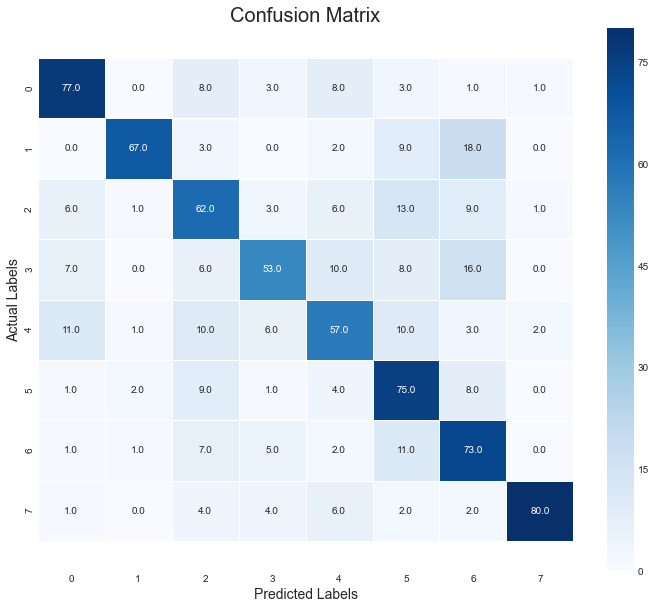

In [98]:
cm = confusion_matrix(actual, predictions,normalize='true')
plt.figure(figsize = (12, 10))
#conf_matrix= pd.DataFrame(cm,columns=None)
#conf_matrix.to_csv(r'E:\confusion_matrix.csv', index = False, header=False)
ax = sns.heatmap(np.round(cm*100), linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
#plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

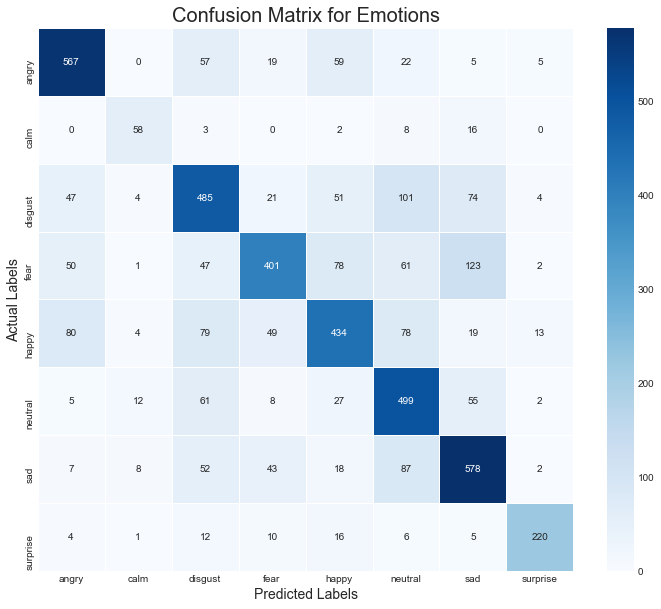

In [100]:
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
# checking loaded model:
# genderless
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Female emotions training Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Female emotions testing Accuracy: {0:.2%}".format(score[1]))

In [ ]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Male emotions training Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print("Male emotions testing Accuracy: {0:.2%}".format(score[1]))

## Training and Validation trends

In [ ]:
show_graphs(history)

In [ ]:
show_graphs(female_history)

In [ ]:
show_graphs(male_history)

## Confusion matrix

In [ ]:
# predicting on test data.
pred_test = female_model.predict(x_testF)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testF)

In [ ]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
# predicting on test data.
pred_test = male_model.predict(x_testM)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testM)

In [ ]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()